In [ ]:
!pip install mplfinance


In [ ]:
!pip install livelossplot


#Modules

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import math
#For the LSTM task
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKerasTF

#Loading of data

In [ ]:
df_eth = pd.read_csv("ETH-USD.csv",parse_dates=True)
df_eth = df_eth.drop(columns=['Adj Close'])

df_xrp = pd.read_csv("xrp.csv",parse_dates=True)
df_iota=pd.read_csv("IOTA.csv", parse_dates=True)
df_doge=pd.read_csv("dogecoin.csv", parse_dates=True)
df_lite=pd.read_csv("litecoin.csv", parse_dates=True)

#Same period of time

I want to analyse the cryptocurrencies datasets in the same period of time, so I delete some rows.

In [ ]:
df_eth['Date']=pd.to_datetime(df_eth['Date'])
df_eth=df_eth[~(df_eth['Date']<'2017-11-09')]
df_eth=df_eth[~(df_eth['Date']>'2021-08-26')]
df_eth.shape

(1387, 6)

In [ ]:
df_xrp['Date']=pd.to_datetime(df_xrp['Date'])
df_xrp=df_xrp[~(df_xrp['Date']<'2017-11-09')]
df_xrp=df_xrp[~(df_xrp['Date']>'2021-08-26')]
df_xrp.shape

(1387, 7)

In [ ]:
df_iota['Date']=pd.to_datetime(df_iota['Date'])
df_iota=df_iota[~(df_iota['Date']<'2017-11-09')]
df_iota=df_iota[~(df_iota['Date']>'2021-08-26')]

df_iota.shape

(1387, 7)

In [ ]:
df_doge['Date']=pd.to_datetime(df_doge['Date'])
df_doge=df_doge[~(df_doge['Date']<'2017-11-09')]
df_doge=df_doge[~(df_doge['Date']>'2021-08-26')]

df_doge.shape

(1387, 7)

In [ ]:
df_lite['Date']=pd.to_datetime(df_lite['Date'])
df_lite=df_lite[~(df_lite['Date']<'2017-11-09')]
df_lite=df_lite[~(df_lite['Date']>'2021-08-26')]

df_lite.shape

(1387, 7)

#Drop of Columns

In [ ]:
df_xrp=df_xrp.drop(['Currency'], axis=1)

In [ ]:
df_iota=df_iota.drop(['Currency'], axis=1)

In [ ]:
df_doge=df_doge.drop(['Currency'], axis=1)

In [ ]:
df_lite=df_lite.drop(['Currency'], axis=1)

In [ ]:
df_eth.dropna(inplace=True)
df_xrp.dropna(inplace=True)
df_iota.dropna(inplace=True)
df_doge.dropna(inplace=True)
df_lite.dropna(inplace=True)

#Data exploration - Trends

In [ ]:
df_eth['100ma'] = df_eth['Close'].rolling(window = 30, min_periods = 0).mean()
df_xrp['100ma'] = df_xrp['Close'].rolling(window = 30, min_periods = 0).mean()
df_iota['100ma'] = df_iota['Close'].rolling(window = 30, min_periods = 0).mean()
df_doge['100ma'] = df_doge['Close'].rolling(window = 30, min_periods = 0).mean()
df_lite['100ma'] = df_lite['Close'].rolling(window = 30, min_periods = 0).mean()


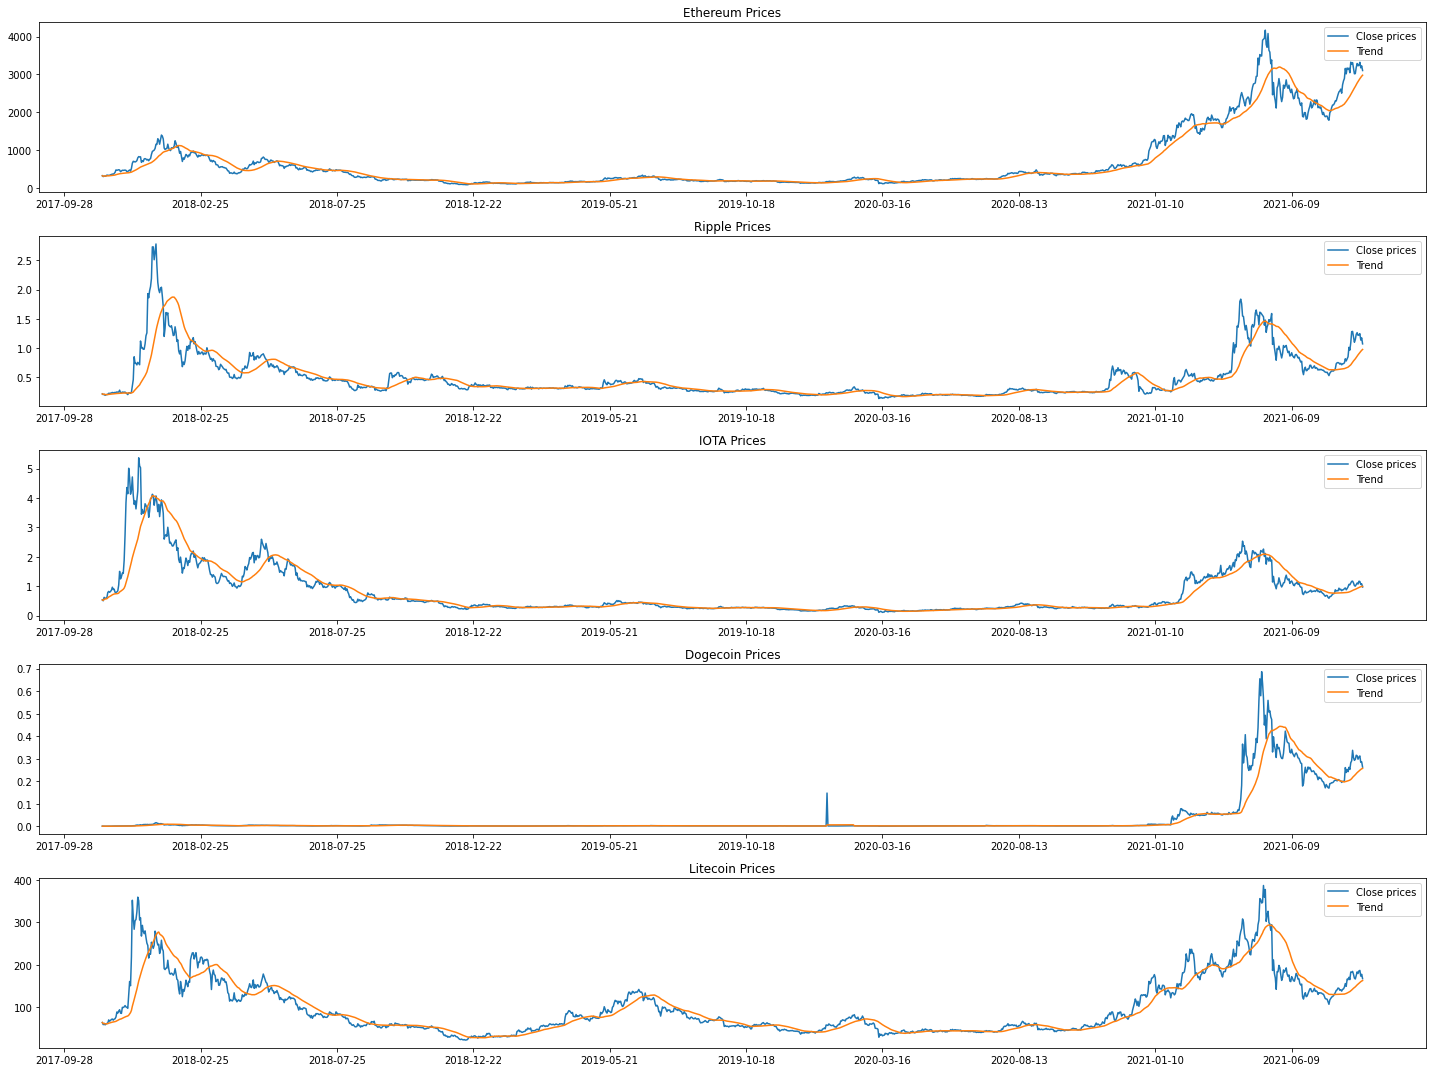

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(20, 15))
ax[0].plot(df_eth.Date, df_eth.Close, label='Close prices')
ax[0].plot(df_eth.Date, df_eth['100ma'],  label='Trend')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[0].set_title('Ethereum Prices')
ax[0].legend()

ax[1].plot(df_xrp.Date, df_xrp.Close, label='Close prices')
ax[1].plot(df_xrp.Date, df_xrp['100ma'], label='Trend')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[1].set_title('Ripple Prices')
ax[1].legend()

ax[2].plot(df_iota.Date, df_iota.Close, label='Close prices')
ax[2].plot(df_iota.Date, df_iota['100ma'], label='Trend')
ax[2].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[2].set_title('IOTA Prices')
ax[2].legend()

ax[3].plot(df_doge.Date, df_doge.Close, label='Close prices')
ax[3].plot(df_doge.Date, df_doge['100ma'], label='Trend')
ax[3].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[3].set_title('Dogecoin Prices')
ax[3].legend()

ax[4].plot(df_lite.Date, df_lite.Close, label='Close prices')
ax[4].plot(df_lite.Date, df_lite['100ma'], label='Trend')
ax[4].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[4].set_title('Litecoin Prices')
ax[4].legend()
#plt.grid()
plt.tight_layout()
plt.show()

We calculate the total value of its outstanding shares on the market, i.e. the market capitalisation.  Market capitalisation is an easy way for investors both to determine the size of a company and to try to assess the risk of investing in its shares.

In [ ]:
df_eth['Total Traded'] = df_eth['Open']*df_eth['Volume']
df_xrp['Total Traded'] = df_xrp['Open']*df_xrp['Volume']
df_iota['Total Traded'] = df_iota['Open']*df_iota['Volume']
df_doge['Total Traded'] = df_doge['Open']*df_doge['Volume']
df_lite['Total Traded'] = df_lite['Open']*df_lite['Volume']


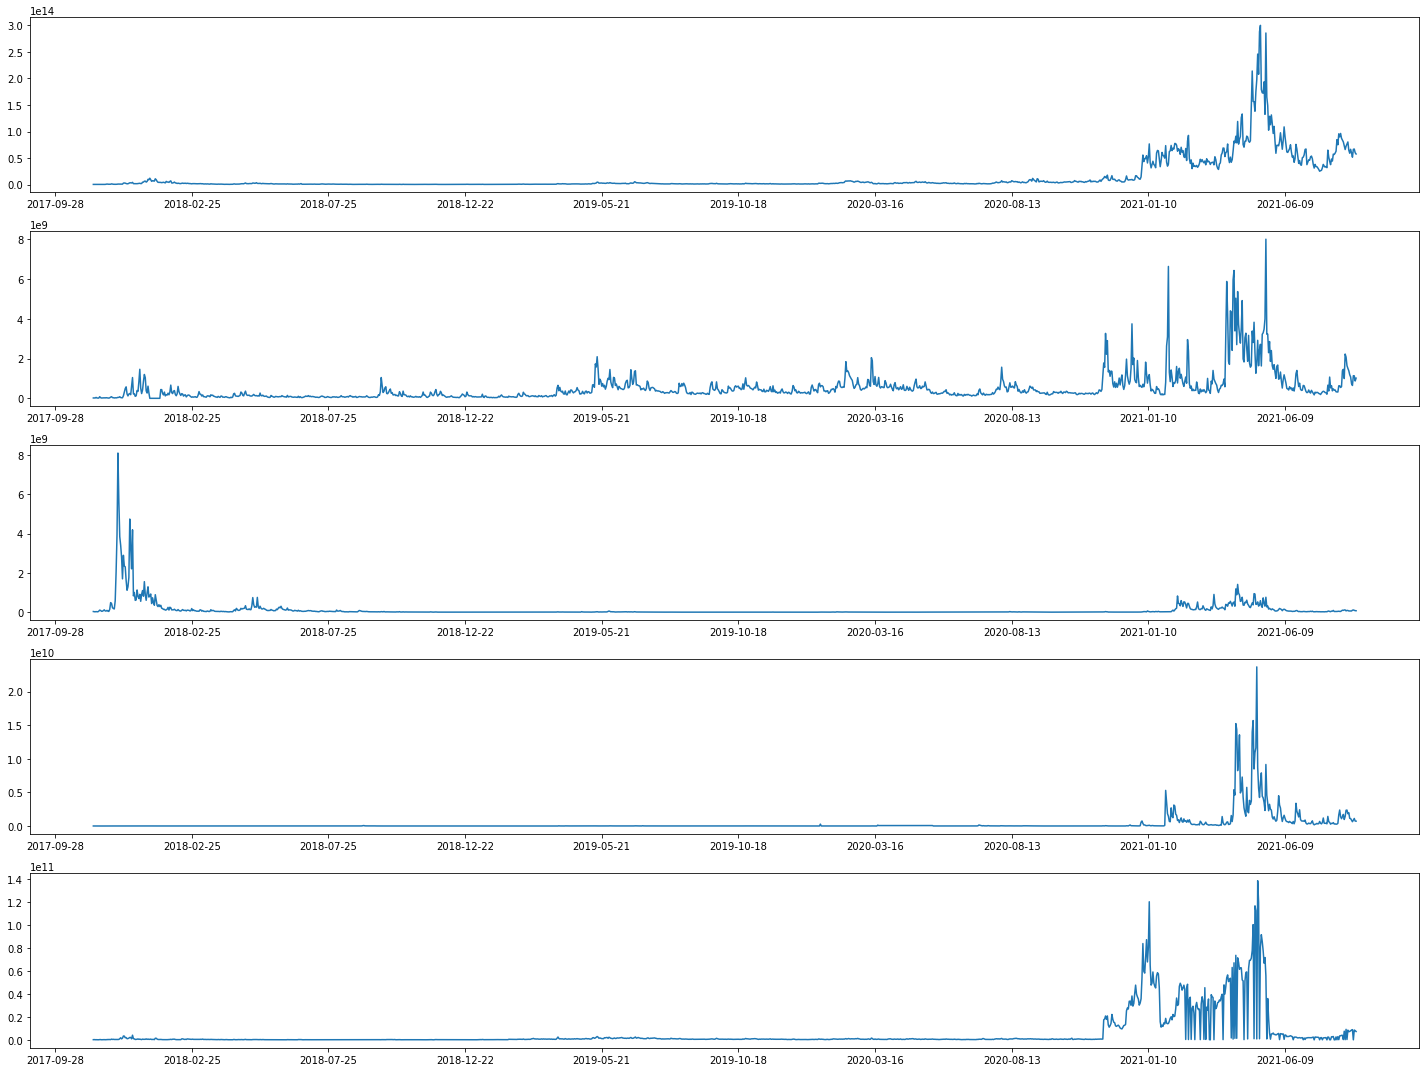

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(20, 15))
ax[0].plot(df_eth.Date, df_eth['Total Traded'])
ax[0].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[1].plot(df_xrp.Date, df_xrp['Total Traded'])
ax[1].xaxis.set_major_locator(plt.MaxNLocator(15))
ax[2].plot(df_iota.Date, df_iota['Total Traded'])
ax[2].xaxis.set_major_locator(plt.MaxNLocator(15))
ax[3].plot(df_doge.Date, df_doge['Total Traded'])
ax[3].xaxis.set_major_locator(plt.MaxNLocator(15))
ax[4].plot(df_lite.Date, df_lite['Total Traded'])
ax[4].xaxis.set_major_locator(plt.MaxNLocator(15))
#plt.title('Total Traded')
plt.tight_layout()
plt.show()


**Ethereum**<br>
We note that the highest peaks relate to the year 2021. Infact I found out in a article that around 13th Ethereum spiked (https://www.livemint.com/market/cryptocurrency/bitcoin-logs-over-800-jump-for-fy21-ethereum-zooms-1300-11617209720781.html)

"*Since October 2019, ethereum has been slowly but gradually stealing the market share from bitcoin. 
In a little more than 1.5 years, ethereum's dominance has gone from roughly 8% to 11.25%. The bulk of this market share can perhaps be attributed to the growth of various decentralized apps and crypto innovations on the ethereum blockchain, such as DeFi and NFTs*"


In [ ]:
df_eth.iloc[df_eth['Total Traded'].argmax()]


Date            2021-05-13 00:00:00
Open                    3828.918457
High                    4032.563477
Low                     3549.407227
Close                   3715.148438
Volume                78398214539.0
100ma                    2937.75035
Total Traded    300180370644222.875
Name: 2106, dtype: object

In [ ]:
df_xrp.iloc[df_xrp['Total Traded'].argmax()]

Date            2021-05-19 00:00:00
Open                        1.59055
High                        1.64286
Low                         0.87542
Close                        1.0617
Volume                   5026776064
100ma                      1.408515
Total Traded        7995338668.5952
Name: 2309, dtype: object

**IOTA**<br>
"*The reason is the collaboration with Microsoft! In fact, the first public marketplace for IoT was launched last week, based in Berlin. IOTA has partnered with Microsoft, Fujitsu and twenty other companies (including Bosch and Accenture) to develop a solution for monetising data from Internet-connected devices. This marketplace will allow people to sell their data while remaining anonymous.
The idea behind IOTA is to allow any Internet-connected device to sell its data on an open marketplace that allows micro-payments. There are no specific applications yet, but according to the IOTA team this will be a new marketplace based on an innovative business model.*" (https://www.ilbitcoin.news/boom-iota-372-10-giorni/)

In [ ]:
df_iota.iloc[df_iota['Total Traded'].argmax()]

Date            2017-12-06 00:00:00
Open                        3.81128
High                        5.54588
Low                         3.65532
Close                       4.35564
Volume                   2126969984
100ma                      1.227581
Total Traded      8106478186.421233
Name: 27, dtype: object

**Dogecoin**<br>
"*Yesterday, 9 May 2021, Geometric Energy Corporation (GEC) announced the first space mission fully funded by Dogecoin in partnership with SpaceX.*"


"*In addition to the transition, the two companies agreed that Dogecoin will be the official currency for all future GEC space missions. Dogecoin will therefore become the first official cryptocurrency for interplanetary trade. Samuel Reid, CEO of Geometric Energy Corporation commented: "After officially negotiating an agreement of this magnitude with DOGE, Geometric Energy Corporation and SpaceX have consolidated DOGE as the unit of account for lunar business in the space sector.*"

(https://www.astrospace.it/2021/05/10/spacex-e-geometric-energy-finanziano-una-missione-verso-la-luna-con-i-dogecoin/)

In [ ]:
df_doge.iloc[df_doge['Total Traded'].argmax()]

Date            2021-05-09 00:00:00
Open                        0.63533
High                       0.697487
Low                        0.423602
Close                      0.568682
Volume                  37251653632
100ma                      0.334222
Total Traded     23667093102.018559
Name: 1436, dtype: object

In [ ]:
df_lite.iloc[df_lite['Total Traded'].argmax()]

Date            2021-05-10 00:00:00
Open                        387.812
High                        412.802
Low                         335.177
Close                       359.106
Volume                    356903200
100ma                    284.004033
Total Traded    138411343798.399994
Name: 1720, dtype: object

I create a candlestick plot for Ethereum prices from April 2021 to July 2021

NameError: ignored

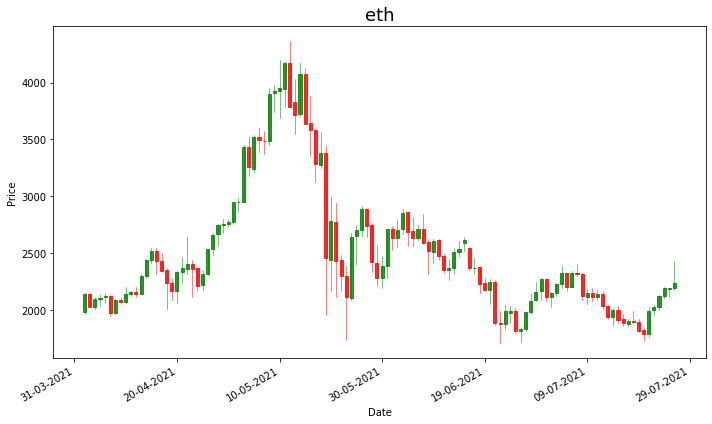

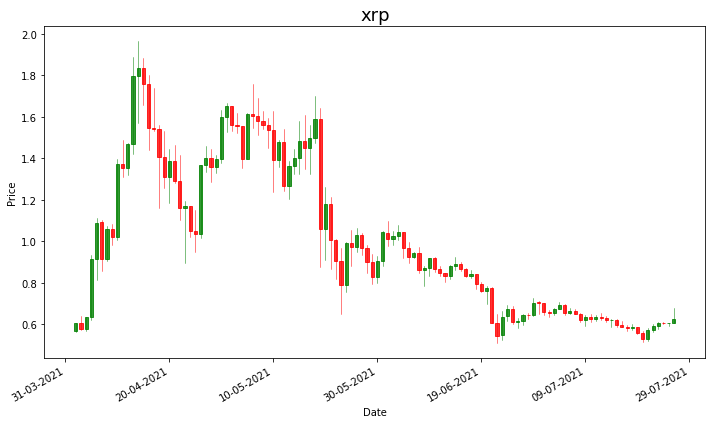

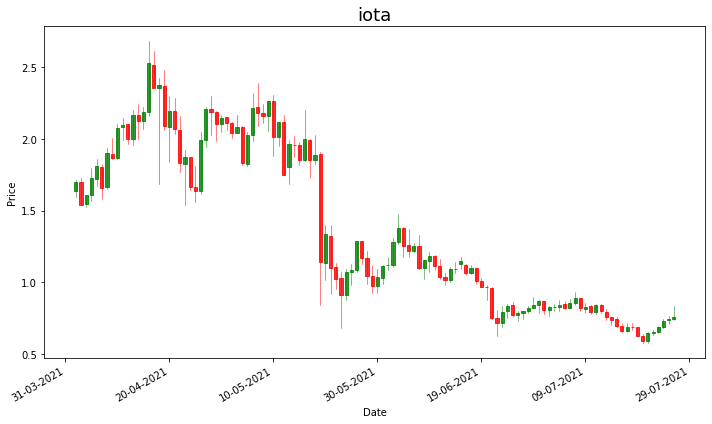

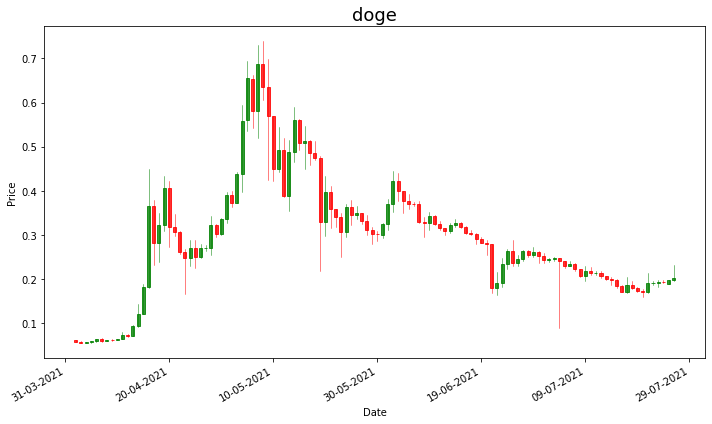

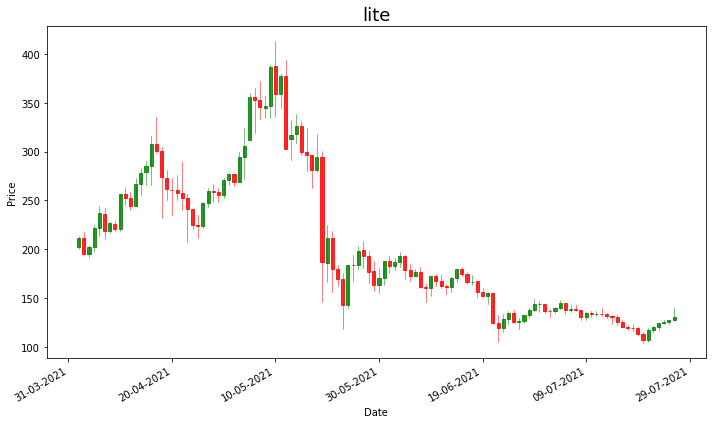

In [ ]:
def candlestick(df,title):
  ohlc = df[(df['Date'] > '2021-04-01') & (df['Date'] <= '2021-07-26')]
  ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
  ohlc['Date'] = pd.to_datetime(ohlc['Date'])
  ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
  ohlc = ohlc.astype(float)
  fig, ax = plt.subplots(figsize = (10,6))
  candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  date_format = mpl_dates.DateFormatter('%d-%m-%Y')
  ax.xaxis.set_major_formatter(date_format)
  ax.set_title(title, fontsize=18)
  fig.autofmt_xdate()
  fig.tight_layout()

a=candlestick(df=df_eth, title='eth')
b=candlestick(df=df_xrp, title='xrp')
c=candlestick(df=df_iota, title='iota')
d=candlestick(df=df_doge, title='doge')
e=candlestick(df=df_lite, title='lite')
#fig, axs = plt.subplots(5, 1, figsize=(20, 15))
axs[0]=a
axs[1]=b
axs[2]=c
axs[3]=d
axs[4]=e
plt.show()
plt.tight_layout()

Percentage change is a way to calculate the degree of change in a stock over a specific period of time using simple arithmetic. This metric is useful to investors, who use it to compare stocks with different price movements. 

\begin{align}
   r_{t}= \frac{p_{t}} {p_{t-1}} -1
  \end{align}

In the formula, ${p_{t}}$ denotes the price of an asset time $t$. Thus, $r_{t}$ is the profit rate of holding the asset from time $t-1$ to $t$.
From here we can define $r_{t}+1$ as the *one period gross return*, which is the ratio of the new market value at the end of the holding period over the initial market value. 

In [ ]:
df_eth["Returns"] = (df_eth["Close"]/df_eth["Close"].shift(1)) - 1
df_xrp["Returns"] = (df_xrp["Close"]/df_xrp["Close"].shift(1)) - 1
df_iota["Returns"] = (df_iota["Close"]/df_iota["Close"].shift(1)) - 1
df_doge["Returns"] = (df_doge["Close"]/df_doge["Close"].shift(1)) - 1
df_lite["Returns"] = (df_lite["Close"]/df_lite["Close"].shift(1)) - 1


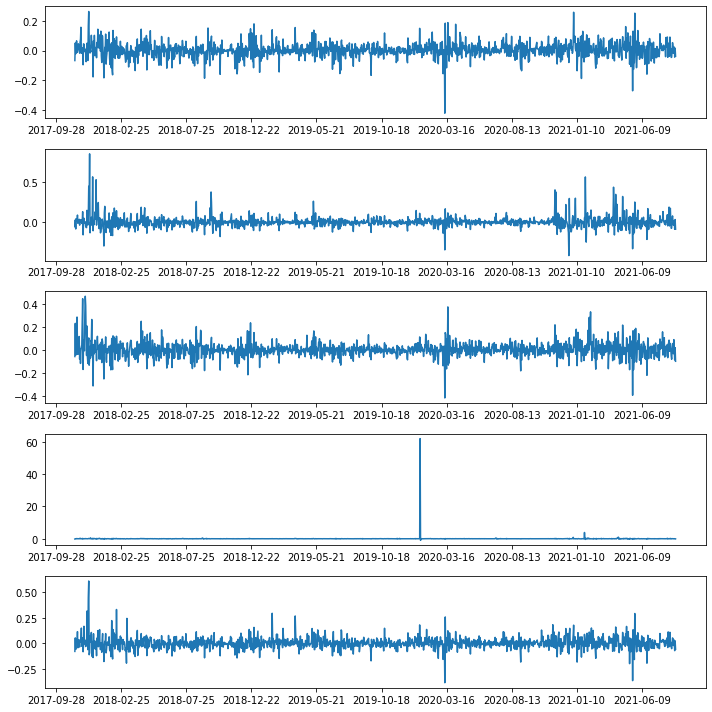

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
ax[0].plot(df_eth.Date, df_eth['Returns'])
ax[0].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[1].plot(df_xrp.Date, df_xrp['Returns'])
ax[1].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[2].plot(df_iota.Date, df_iota['Returns'])
ax[2].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[3].plot(df_doge.Date, df_doge['Returns'])
ax[3].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[4].plot(df_lite.Date, df_lite['Returns'])
ax[4].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
#plt.title('Returns')
plt.tight_layout()
#plt.grid()
plt.show()


The cumulative return is the total change in the investment price over a set time—an aggregate return, not an annualized one (https://www.investopedia.com/terms/c/cumulativereturn.asp#:~:text=The%20cumulative%20return%20is%20the,investment%20impacts%20its%20cumulative%20return).

\begin{align}
  c_{t}=(1+r_{t})c_{t-1}
      \end{align}

In [ ]:
df_eth["Cumulative Return"] = (1 + df_eth["Returns"]).cumprod()
df_xrp["Cumulative Return"] = (1 + df_xrp["Returns"]).cumprod()
df_iota["Cumulative Return"] = (1 + df_iota["Returns"]).cumprod()
df_doge["Cumulative Return"] = (1 + df_doge["Returns"]).cumprod()
df_lite["Cumulative Return"] = (1 + df_lite["Returns"]).cumprod()


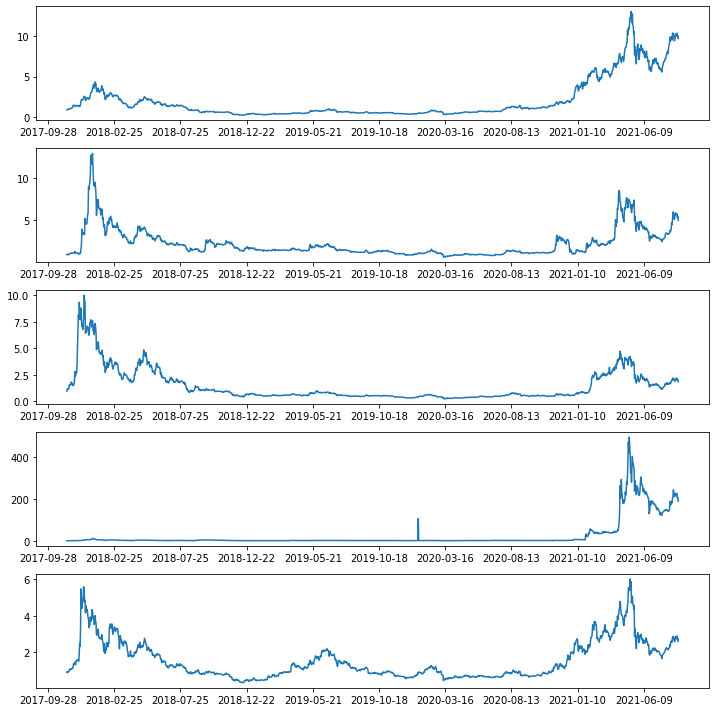

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
ax[0].plot(df_eth.Date, df_eth['Cumulative Return'])
ax[0].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[1].plot(df_xrp.Date, df_xrp['Cumulative Return'])
ax[1].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[2].plot(df_iota.Date, df_iota['Cumulative Return'])
ax[2].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[3].plot(df_doge.Date, df_doge['Cumulative Return'])
ax[3].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[4].plot(df_lite.Date, df_lite['Cumulative Return'])
ax[4].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
#plt.title('Returns')
plt.tight_layout()
#plt.grid()
plt.show()


In [ ]:
df_eth.iloc[df_eth['Cumulative Return'].argmax()]


Date                   2021-05-11 00:00:00
Open                           3948.271973
High                           4178.208984
Low                            3783.889404
Close                          4168.701172
Volume                       52679737865.0
100ma                          2835.668481
Total Traded         207993932557366.34375
Returns                           0.054755
Cumulative Return                12.991303
Name: 2104, dtype: object

#Drop na

In [ ]:
df_eth.dropna(inplace=True)

In [ ]:
df_xrp.dropna(inplace=True)
df_iota.dropna(inplace=True)
df_doge.dropna(inplace=True)
df_lite.dropna(inplace=True)

In [ ]:
df_eth["Date"] = pd.to_datetime(df_eth["Date"])
df_eth["Year"] = df_eth["Date"].dt.year
df_eth["Month"] = df_eth["Date"].dt.month
df_eth["Day"] = df_eth["Date"].dt.day

In [ ]:
tmp_df_eth = df_eth.groupby(["Date"])["Open","Close", "Volume", "Returns"].sum().reset_index()
tmp_df_eth["Volume"] = np.log(tmp_df_eth["Volume"])
tmp_df_eth["Diff"] = tmp_df_eth["Close"] - tmp_df_eth["Open"] 

tmp_df_eth


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,Open,Close,Volume,Returns,Diff
0,2017-11-10,320.670990,299.252991,20.602212,-0.067411,-21.417999
1,2017-11-11,298.585999,314.681000,20.551648,0.051555,16.095001
2,2017-11-12,314.690002,307.907990,21.201659,-0.021523,-6.782012
3,2017-11-13,307.024994,316.716003,20.764302,0.028606,9.691009
4,2017-11-14,316.763000,337.631012,20.790625,0.066037,20.868012
...,...,...,...,...,...,...
1377,2021-08-22,3226.227295,3242.115479,23.494809,0.004969,15.888184
1378,2021-08-23,3241.357422,3319.257324,23.744233,0.023794,77.899902
1379,2021-08-24,3324.855469,3172.456299,23.725528,-0.044227,-152.399170
1380,2021-08-25,3174.269775,3224.915283,23.662572,0.016536,50.645508


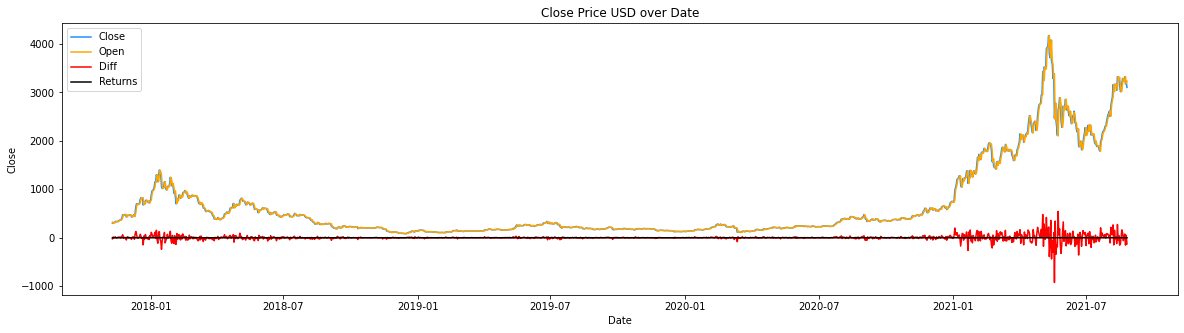

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df_eth, x="Date", y="Close", color="dodgerblue", label="Close")
sns.lineplot(data=tmp_df_eth, x="Date", y="Open", color="orange", label="Open")
sns.lineplot(data=tmp_df_eth, x="Date", y="Diff", color="red", label="Diff")
sns.lineplot(data=tmp_df_eth, x="Date", y="Returns", color='black', label="Returns")
plt.title('Close Price USD over Date')
plt.legend()
plt.show();

#LSTM

In [ ]:
def split_date(df):
    df["Date"] = pd.to_datetime(df["Date"])
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Day"] = df["Date"].dt.day
    
split_date(df_eth)
split_date(df_xrp)
split_date(df_iota)
split_date(df_doge)
split_date(df_lite)

In [ ]:

dataset_df_eth = df_eth[["Date", "Cumulative Return", "Volume", "Year", "Month", "Day"]]
dataset_df_xrp = df_xrp[["Date", "Cumulative Return", "Volume", "Year", "Month", "Day"]]
dataset_df_iota = df_iota[["Date", "Cumulative Return", "Volume", "Year", "Month", "Day"]]
dataset_df_doge = df_doge[["Date", "Cumulative Return", "Volume", "Year", "Month", "Day"]]
dataset_df_lite = df_lite[["Date", "Cumulative Return", "Volume", "Year", "Month", "Day"]]


In [ ]:
def split_sequence(sequence, n_steps_in, n_steps_out):
    data_x, data_y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
  
        if out_end_ix > len(sequence):
            break
        
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        data_x.append(seq_x[:,1:])
        data_y.append(seq_y[:,0])
    return np.array(data_x), np.array(data_y)

def model_score(model, X_train, y_train, X_test, y_test):
    train_score = model.evaluate(X_train, y_train, verbose=1)
    print("Train score: %0.5f MSE(%.2f RMSE)" % (train_score[0], math.sqrt(train_score[0])))
    
    test_score = model.evaluate(X_test, y_test, verbose=1)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (test_score[0], math.sqrt(test_score[0])))
def invTransform(scaler, data):
    dummy = pd.DataFrame(np.zeros((len(data), scaler.n_features_in_)))
    dummy[0] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=dummy.columns)
    return dummy[0].values


In [ ]:
def ok(dataset, e, bs):
    train_df = dataset[dataset['Date'] <= '2021'][['Cumulative Return', 'Date']].set_index('Date')
    test_df = dataset[dataset['Date'] > '2021'][['Cumulative Return', 'Date']].set_index('Date')
    plt.plot(train_df)
    plt.plot(test_df)
    plt.legend(['train', 'test'])
    plt.show()
    dataset.drop(["Date"], axis=1, inplace=True);

    TEST_PERCENT = len(test_df)/len(dataset)

    scaler = MinMaxScaler(feature_range=(0,1))
    dataset = scaler.fit_transform(dataset)

    train_len = int(len(dataset) * (1-TEST_PERCENT))
    test_len = len(dataset) - train_len

    train = dataset[0:train_len]

    test = dataset[len(train):]

    n_steps_in, n_steps_out = 180, 1
    n_features = 4

    X_train, y_train = split_sequence(train, n_steps_in, n_steps_out)
    X_test, y_test = split_sequence(test, n_steps_in, n_steps_out)

    model_wieght_file = "best_model.hdf_eth5"
    lr_reduce = ReduceLROnPlateau(monitor="val_loss", factor=0, min_delta=0.001, patience=1, verbose=1)
    checkpoint = ModelCheckpoint(model_wieght_file, monitor="val_loss", verbose=1, save_best_only=True, mode="min")
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    callbacks = [PlotLossesKerasTF(), es, checkpoint]

    model = Sequential()

    model.add(LSTM(256 , input_shape = (n_steps_in , n_features) , return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(256))
    model.add(Dropout(0.4))
    model.add(Dense(64 ,  activation = 'relu'))
    model.add(Dense(1))

    model.summary()


    model.compile(loss="mean_squared_error", 
                  optimizer=Adam(learning_rate=0.0005), 
                  metrics=["mean_squared_error"])

    EPOCHS = e
    BATCH_SIZE = bs

    history = model.fit(X_train, 
                        y_train, 
                        epochs = EPOCHS,
                        batch_size = BATCH_SIZE,
                        callbacks = callbacks, 
                        validation_data = (X_test,y_test))


    model_score(model, X_train, y_train, X_test, y_test)
    pred = model.predict(X_test)
    pred = invTransform(scaler, pred)
    pred[:10]
    pred_df_eth = test_df.copy()
    pred_df_eth[:-n_steps_in]["Cumulative Return"] = pred
    
    plt.rcParams["figure.figsize"] = (15,7)
    plt.plot(test_df["Cumulative Return"], 'b', label='Ethurem Series')
    plt.plot(pred_df_eth["Cumulative Return"] , 'r', label='Predicted Ethurem Series')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Return')
    plt.title('Check the accuracy of the model with time')
    plt.grid(True)
    plt.legend()
    plt.show()


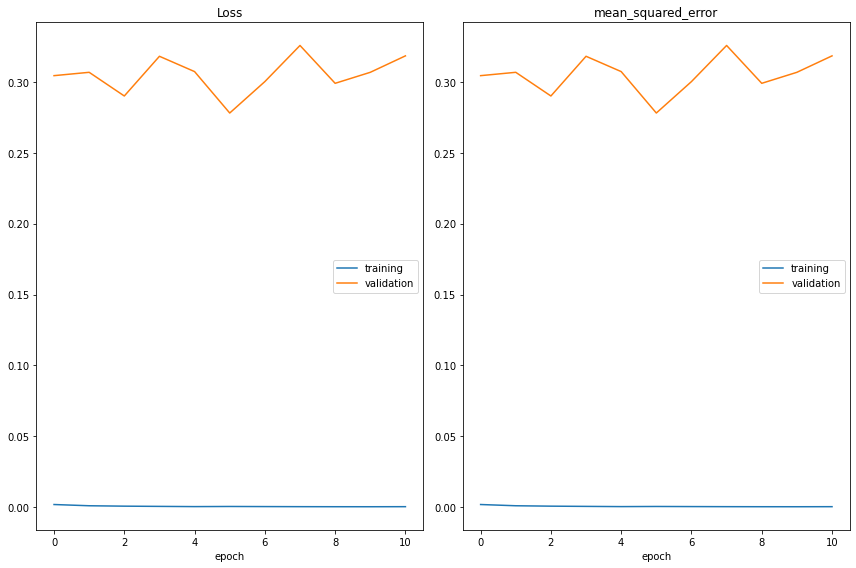

Loss
	training         	 (min:    0.000, max:    0.002, cur:    0.000)
	validation       	 (min:    0.278, max:    0.326, cur:    0.318)
mean_squared_error
	training         	 (min:    0.000, max:    0.002, cur:    0.000)
	validation       	 (min:    0.278, max:    0.326, cur:    0.318)

Epoch 00011: val_loss did not improve from 0.27811
61/61 [==============================] - 68s 1s/step - loss: 2.6506e-04 - mean_squared_error: 2.6506e-04 - val_loss: 0.3185 - val_mean_squared_error: 0.3185
Epoch 00011: early stopping
31/31 [==============================] - 12s 393ms/step - loss: 1.4726e-04 - mean_squared_error: 1.4726e-04
Train score: 0.00015 MSE(0.01 RMSE)
2/2 [==============================] - 1s 311ms/step - loss: 0.3185 - mean_squared_error: 0.3185
Test Score: 0.31846 MSE (0.56 RMSE)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


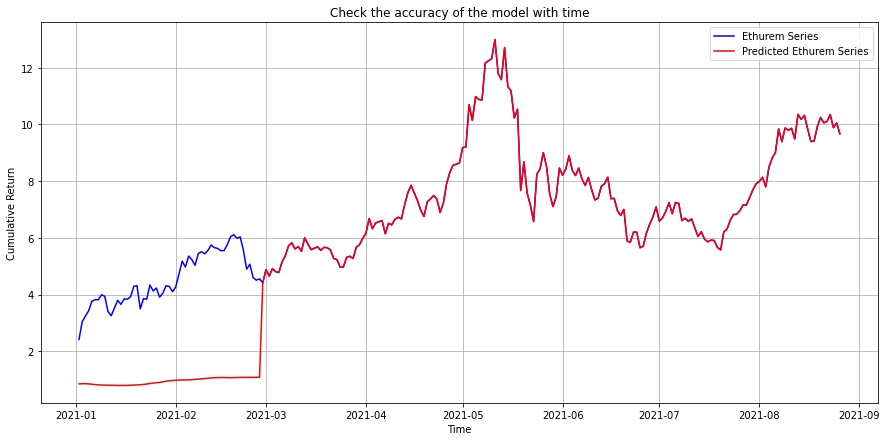

In [ ]:
ok(dataset_df_eth, e=20, bs=16)

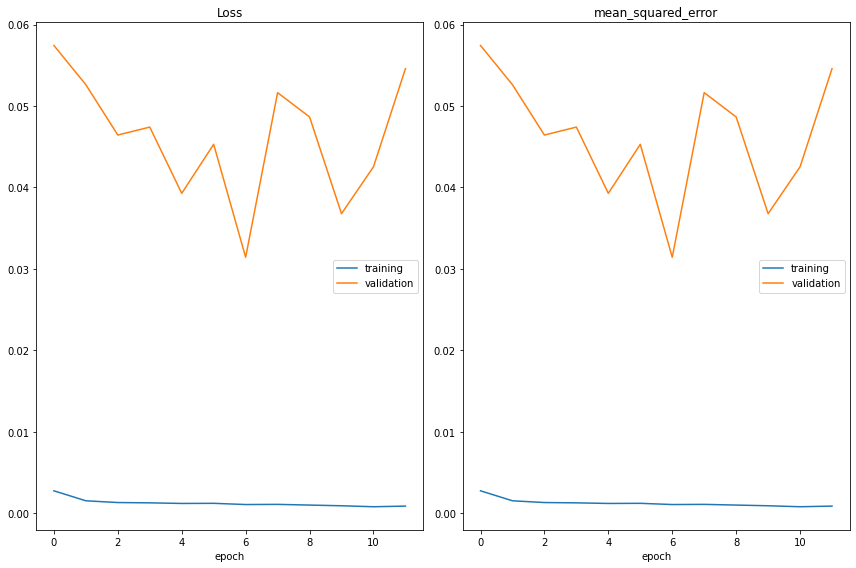

Loss
	training         	 (min:    0.001, max:    0.003, cur:    0.001)
	validation       	 (min:    0.031, max:    0.057, cur:    0.055)
mean_squared_error
	training         	 (min:    0.001, max:    0.003, cur:    0.001)
	validation       	 (min:    0.031, max:    0.057, cur:    0.055)

Epoch 00012: val_loss did not improve from 0.03142
61/61 [==============================] - 76s 1s/step - loss: 8.6573e-04 - mean_squared_error: 8.6573e-04 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 00012: early stopping
31/31 [==============================] - 13s 405ms/step - loss: 9.8039e-04 - mean_squared_error: 9.8039e-04
Train score: 0.00098 MSE(0.03 RMSE)
2/2 [==============================] - 1s 312ms/step - loss: 0.0546 - mean_squared_error: 0.0546
Test Score: 0.05458 MSE (0.23 RMSE)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


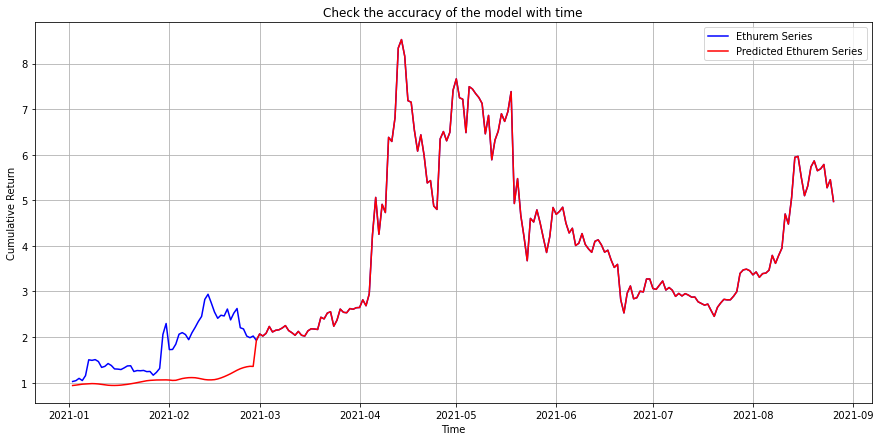

In [ ]:
ok(dataset_df_xrp, e=20, bs=16)

In [ ]:
ok(dataset_df_iota, e=20, bs=16)

KeyError: ignored

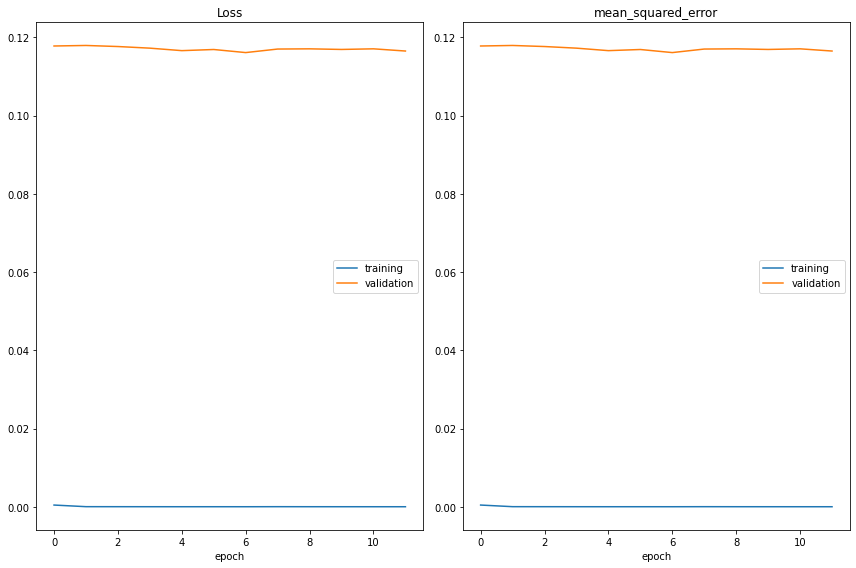

Loss
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.116, max:    0.118, cur:    0.117)
mean_squared_error
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.116, max:    0.118, cur:    0.117)

Epoch 00012: val_loss did not improve from 0.11613
61/61 [==============================] - 69s 1s/step - loss: 4.8938e-05 - mean_squared_error: 4.8938e-05 - val_loss: 0.1165 - val_mean_squared_error: 0.1165
Epoch 00012: early stopping
31/31 [==============================] - 12s 390ms/step - loss: 4.8120e-05 - mean_squared_error: 4.8120e-05
Train score: 0.00005 MSE(0.01 RMSE)
2/2 [==============================] - 1s 295ms/step - loss: 0.1165 - mean_squared_error: 0.1165
Test Score: 0.11653 MSE (0.34 RMSE)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


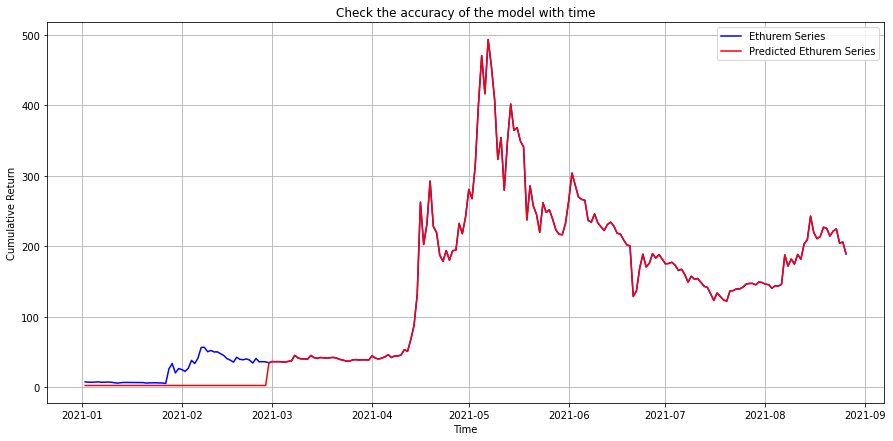

In [ ]:
ok(dataset_df_doge, e=20, bs=16)

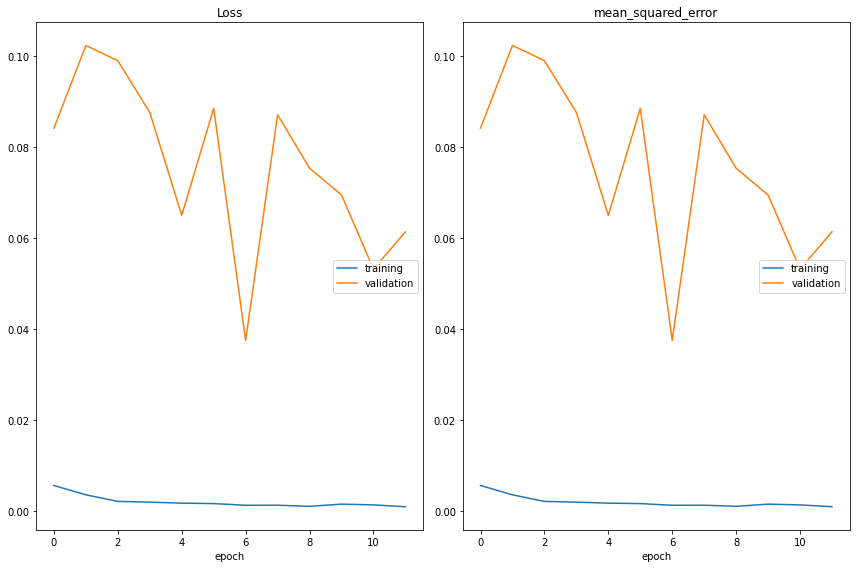

Loss
	training         	 (min:    0.001, max:    0.006, cur:    0.001)
	validation       	 (min:    0.037, max:    0.102, cur:    0.061)
mean_squared_error
	training         	 (min:    0.001, max:    0.006, cur:    0.001)
	validation       	 (min:    0.037, max:    0.102, cur:    0.061)

Epoch 00012: val_loss did not improve from 0.03746
61/61 [==============================] - 72s 1s/step - loss: 8.9738e-04 - mean_squared_error: 8.9738e-04 - val_loss: 0.0613 - val_mean_squared_error: 0.0613
Epoch 00012: early stopping
31/31 [==============================] - 12s 399ms/step - loss: 5.8600e-04 - mean_squared_error: 5.8600e-04
Train score: 0.00059 MSE(0.02 RMSE)
2/2 [==============================] - 1s 294ms/step - loss: 0.0613 - mean_squared_error: 0.0613
Test Score: 0.06135 MSE (0.25 RMSE)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


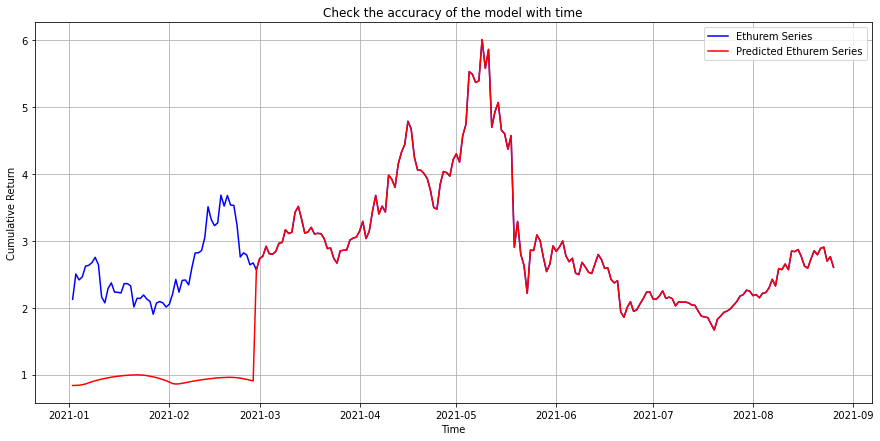

In [ ]:
ok(dataset_df_lite, e=20, bs=16)

In [ ]:
# train_df_eth = dataset_df_eth[dataset_df_eth['Date'] <= '2021'][['Close', 'Date']].set_index('Date')
# test_df_eth = dataset_df_eth[dataset_df_eth['Date'] > '2021'][['Close', 'Date']].set_index('Date')
# plt.plot(train_df_eth)
# plt.plot(test_df_eth)
# plt.legend(['train', 'test'])

In [ ]:
# dataset_df_eth.drop(["Date"], axis=1, inplace=True);


In [ ]:
# TEST_PERCENT = len(test_df_eth)/len(dataset_df_eth)
# TEST_PERCENT


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0,1))
# dataset = scaler.fit_transform(dataset_df_eth)

In [ ]:
# train_len = int(len(dataset) * (1-TEST_PERCENT))
# test_len = len(dataset) - train_len

In [ ]:
# train = dataset[0:train_len]
# train

In [ ]:
# test = dataset[len(train):]
# test

In [ ]:
# n_steps_in, n_steps_out = 180, 1
# n_features = 4

# X_train, y_train = split_sequence(train, n_steps_in, n_steps_out)
# X_test, y_test = split_sequence(test, n_steps_in, n_steps_out)

In [ ]:
# print(X_train.shape , y_train.shape)
# print(X_test.shape , y_test.shape)

In [ ]:
# model_wieght_file = "best_model.hdf_eth5"
# lr_reduce = ReduceLROnPlateau(monitor="val_loss", factor=0, min_delta=0.001, patience=1, verbose=1)
# checkpoint = ModelCheckpoint(model_wieght_file, monitor="val_loss", verbose=1, save_best_only=True, mode="min")
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# callbacks = [PlotLossesKerasTF(), es, checkpoint]


In [ ]:
# model = Sequential()

# model.add(LSTM(256 , input_shape = (n_steps_in , n_features) , return_sequences=True))
# model.add(Dropout(0.4))
# model.add(LSTM(256))
# model.add(Dropout(0.4))
# model.add(Dense(64 ,  activation = 'relu'))
# model.add(Dense(1))

# model.summary()

In [ ]:
# model.compile(loss="mean_squared_error", 
#               optimizer=Adam(learning_rate=0.0005), 
#               metrics=["mean_squared_error"])

#Tuning of parameters

In [ ]:
# EPOCHS = 20
# BATCH_SIZE = 16

# history = model.fit(X_train, 
#                     y_train, 
#                     epochs = EPOCHS,
#                     batch_size = BATCH_SIZE,
#                     callbacks = callbacks, 
#                     validation_data = (X_test,y_test))

In [ ]:
# model_score(model, X_train, y_train, X_test, y_test)


In [ ]:
# pred = model.predict(X_test)
# pred = invTransform(scaler, pred)
# pred[:10]

In [ ]:
# pred_df_eth = test_df_eth.copy()
# pred_df_eth[:-n_steps_in]["Close"] = pred

In [ ]:
# #print("Red - Predicted Ethurem Series  ,  Blue - Ethurem Series")
# plt.rcParams["figure.figsize"] = (15,7)
# plt.plot(test_df_eth["Close"], 'b', label='Ethurem Series')
# plt.plot(pred_df_eth["Close"] , 'r', label='Predicted Ethurem Series')
# plt.xlabel('Time')
# plt.ylabel('Close')
# #plt.title('Check the accuracy of the model with time')
# plt.grid(True)
# plt.legend()
# plt.show()